In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<h1>Table of Content</h1>
<ol>
    <li>[<b>Introduction</b>](#introduction)</li>
    <li>[<b>Aims</b>](#aims)</li>
    <li>[<b>Quality Analysis</b>](#quality_analysis)</li>
    <ul>
        <li>[<b>Null Values</b>](#null_values)</li>
        <li>[<b>Data Problems</b>](#data_problems)</li>
    </ul>
    <li>[<b>Analysis and Visualization of Data</b>](#quality_visualization)</li>
</ol>

<h1>BreadBasket: Selling Patterns</h1>
<h2>by Luis Alarcon</h2>

<h2><a class="anchor" id="introduction">Introduction</a></h2>

<p>The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset has 21293 entires, over 6000 transactions and 4 columns:</p>
<ul>
    <li><b>Date</b>: Categorical variable that tells us the date of the transactions (YYYY-MM-DD format).</li>
    <li><b>Time</b>: Categorical variable that tells us the time of the transactions (HH:MM:SS format).</li>
    <li><b>Transaction</b>: Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction, that's why the data set has less transactions than observations.</li>
    <li><b>Item</b>: Categorical variable with the products.</li>
</ul>



In [2]:
#loading extra packages
from multiprocessing.dummy import Pool as ThreadPool 
#Loading Dataset
df = pd.read_csv("./dataset/BreadBasket_DMS.csv")
print("Overall information about the BreadBasket_DMS dataset")
df.info()
print("\nSample of the BreadBasket_DMS dataset")
df.head(5)

Overall information about the BreadBasket_DMS dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB

Sample of the BreadBasket_DMS dataset


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


<h2><a class="anchor" id="aims">Aims</a></h2>

<h2><a class="anchor" id="quality_analysis">Quality Analysis</a></h2>
<h3><a class="anchor" id="null_values">Null Values</a></h3>

In [3]:
df.isnull().values.any()

False

<p>There were no null values found in the dataset. Therefore we proceed to find any values in the Item column that does not represent an item to be sold. For example, "none".</p>

In [4]:
print(df.loc[df["Item"]=="NONE"].Item.value_counts())

NONE    786
Name: Item, dtype: int64


<p>There are a total of 786 entries with transactions with a "None" item. This value seems high, and we continue by finding the top then items found in the dataset and see where "None" is found.</p>

In [5]:
# Count of Unique Items in transactions
df_counts = df["Item"].value_counts()
#top ten items bought
print("Top 10 most ordered time in transactions")
df_counts.head(10)

Top 10 most ordered time in transactions


Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

<h3><a class="anchor" id="data_problems">Data Problems</a></h3>
<p>After initial analysis of the BreadBasket dataset, some issues were found:</p>
<ol>
    <li><b>Item</b>: The items in the dataset with value "None" needs to be eliminated from the dataset.</li>
    <li><b>Date and Time</b>: These columns are <i>non-null object</i> and need to be changed to <i>datetime</i> data type.</li>
    <li><b>date_time</b>: A new column needs to be created that binds the column Date and Time as one and under the <i>datetime</i> data type. </li>
    <li><b>period_day</b>: A new column will be created that shows whether the transaction was made in the morning, afternoon, evening or night.</li>
    <li><b>weekday_weekend</b>: A new column will be created that shows whether the transaction was made in the weekday or weekend.</li>
    <li><b>weekday</b>: A new column will be created that shows which day of the week the transaction was made.</li>
</ol>

<p>All the new columns are created in order to have a better possibility to understand purchase pattern depending on more factors.</p>
 	 	

<h4>1. Item</h4>

In [6]:
#Create a new DataFrame without NONE as an item
df_modified= df[df["Item"]!="NONE"].reset_index(drop=True)
df_modified.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


<h4>2. date_time</h4>

In [7]:
#Create a new Column that stores Date and Time Together but as a Date format
df_modified["date_time"]= pd.to_datetime(df_modified["Date"]+" "+df_modified["Time"])
#Drop Data and Time as columns
df_modified.drop(df[["Date", "Time"]], axis=1, inplace=True)
#New Dataframe
print("Overall information about the modified BreadBasket_DMS dataset")
df_modified.info()
print("\nSample of the modified BreadBasket_DMS dataset")
df_modified.head(5)


Overall information about the modified BreadBasket_DMS dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 3 columns):
Transaction    20507 non-null int64
Item           20507 non-null object
date_time      20507 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 480.7+ KB

Sample of the modified BreadBasket_DMS dataset


,Transaction,Item,date_time
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57


<h4>3. period_day</h4>

In [8]:
# addition of period time column that has whether the time is in the morning, afternoon, everning or night
# morning hours bellow 12:00
# afternoon hours between 12:00 and 17:00
# everning hours between 17:00 and 21:00
# night hours above 21:00
df_modified["period_day"]=np.nan
#Morning
morning_mask =(df_modified["date_time"].dt.hour>=1)&(df_modified["date_time"].dt.hour<12)
df_modified.loc[morning_mask,"period_day"] ="morning"
#Afternoon
afternoon_mask = (df_modified["date_time"].dt.hour>=12)&(df_modified["date_time"].dt.hour<17)
df_modified.loc[afternoon_mask,"period_day"] ="afternoon"
#Evening
evening_mask = (df_modified["date_time"].dt.hour>=17)&(df_modified["date_time"].dt.hour<21)
df_modified.loc[evening_mask,"period_day"] ="evening"
#Night
night_mask = (df_modified["date_time"].dt.hour>=21)&(df_modified["date_time"].dt.hour<=24)
df_modified.loc[night_mask,"period_day"] ="night"
#df_modified.loc[df_modified["Date/Time"].dt.hour<=12,"period_time"] ="night"
print("Period of Day column added")
df_modified.head(10)
#print(df_modified.loc[df_modified["period_time"]=="morning"])

Period of Day column added


,Transaction,Item,date_time,period_day
0,1,Bread,2016-10-30 09:58:11,morning
1,2,Scandinavian,2016-10-30 10:05:34,morning
2,2,Scandinavian,2016-10-30 10:05:34,morning
3,3,Hot chocolate,2016-10-30 10:07:57,morning
4,3,Jam,2016-10-30 10:07:57,morning
5,3,Cookies,2016-10-30 10:07:57,morning
6,4,Muffin,2016-10-30 10:08:41,morning
7,5,Coffee,2016-10-30 10:13:03,morning
8,5,Pastry,2016-10-30 10:13:03,morning
9,5,Bread,2016-10-30 10:13:03,morning


<h4>4. weekday_weekend and weekday</h4>

In [9]:
# Addition of column Weekday/Weekend, which shows whether the day it is within the Weekday or Weekend
df_modified["weekday_weekend"]=np.nan
# We add the number of week value in a column named weekday
df_modified["weekday"]= df_modified["date_time"].dt.dayofweek
# We create a mask with the index of parameters applied to the column Weekday
# For example: Monday is 0 and Saturday is 5
mask_weekday = (df_modified["weekday"]>=0)&(df_modified["weekday"]<=4)
df_modified.loc[mask_weekday,"weekday_weekend"] ="weekday"
#We create a mask with the index of parameters applied to the column Weekend
mask_weekday = (df_modified["weekday"]>=5)&(df_modified["weekday"]<=6)
df_modified.loc[mask_weekday,"weekday_weekend"] ="weekend"
# We drop the week of day column "weekday"
#df_modified.drop('weekday', axis=1, inplace=True)
print("Weekday or Weekdend column added")
df_modified.head(10)

Weekday or Weekdend column added


,Transaction,Item,date_time,period_day,weekday_weekend,weekday
0,1,Bread,2016-10-30 09:58:11,morning,weekend,6
1,2,Scandinavian,2016-10-30 10:05:34,morning,weekend,6
2,2,Scandinavian,2016-10-30 10:05:34,morning,weekend,6
3,3,Hot chocolate,2016-10-30 10:07:57,morning,weekend,6
4,3,Jam,2016-10-30 10:07:57,morning,weekend,6
5,3,Cookies,2016-10-30 10:07:57,morning,weekend,6
6,4,Muffin,2016-10-30 10:08:41,morning,weekend,6
7,5,Coffee,2016-10-30 10:13:03,morning,weekend,6
8,5,Pastry,2016-10-30 10:13:03,morning,weekend,6
9,5,Bread,2016-10-30 10:13:03,morning,weekend,6


In [10]:
path = "./dataset/BreadBasket_DMS_modified.csv"
df_modified.to_csv(path,index=False)

<h2><a class="anchor" id="quality_visualization">Analysis and Visualization of Data</a></h2>


In [11]:
df_Item_by_weekday_count = df_modified.groupby(["weekday","Item"])["Transaction"].count()
df_Item_by_weekday_count=df_Item_by_weekday_count.reset_index()
#print(df_Item_by_weekday_count.loc[df_Item_by_weekday_count["weekday"]==0].describe())
df_Item_by_weekday_count.head(5)


,weekday,Item,Transaction
0,0,Afternoon with the baker,5
1,0,Alfajores,32
2,0,Art Tray,2
3,0,Baguette,10
4,0,Bakewell,8


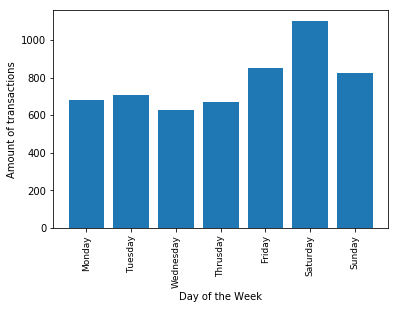

In [13]:
import matplotlib.pyplot as plt
name_day = ["Monday","Tuesday","Wednesday","Thrusday","Friday","Saturday","Sunday"]
plt.bar(df_Item_by_weekday_count["weekday"],df_Item_by_weekday_count["Transaction"])
plt.xlabel("Day of the Week")
plt.ylabel("Amount of transactions")
plt.xticks([0,1,2,3,4,5,6],name_day, fontsize=9,rotation=90)
plt.savefig('./graphs/total_amount-transaction-vs-day.png',bbox_inches='tight', dpi=1500)
plt.show()

In [12]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(9, 4))
plt.bar(df_Item_by_weekday_count["Item"],df_Item_by_weekday_count["Transaction"])
plt.xlabel("Items")
plt.ylabel("Amount of transactions")
plt.xticks(fontsize=4,rotation=90)
plt.savefig('./graphs/total_amount-transaction-vs-items.png',bbox_inches='tight', dpi=1500)
plt.show()

<Figure size 900x400 with 1 Axes>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436 entries, 369 to 4804
Data columns (total 6 columns):
Transaction        4436 non-null int64
Item               4436 non-null object
date_time          4436 non-null datetime64[ns]
period_day         4436 non-null object
weekday_weekend    4436 non-null object
weekday            4436 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 242.6+ KB


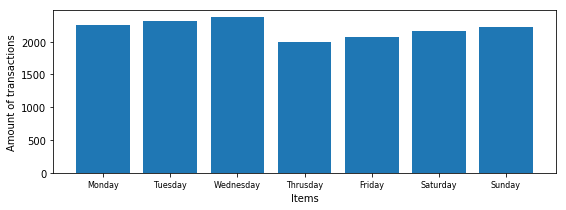

In [14]:
mask_november_2016 = (df_modified["date_time"].dt.month==11)&(df_modified["date_time"].dt.year==2016)
df_m_10_2016= df_modified.loc[df_modified["date_time"].dt.month==11]
df_m_10_2016.info()
plt.figure(1, figsize=(9, 3))
plt.bar(df_m_10_2016["weekday"],df_m_10_2016["Transaction"])
plt.xlabel("Items")
plt.ylabel("Amount of transactions")
plt.xticks([0,1,2,3,4,5,6],name_day,fontsize=8)
plt.savefig('./graphs/nov_amount-transaction-vs-day.png',bbox_inches='tight', dpi=1500)
plt.show()

In [15]:
import datetime
# Creating an array to extract months abbreviations
name_month = df_modified["date_time"].dt.month.reset_index()
def mapper(month):
    date = datetime.datetime(2000, month, 1)  
    return date.strftime('%b')  
# Create a list of ordered Month abbreviations
name_month=name_month['date_time'].apply(mapper).unique()
# Create an array of month numbers found in the dataset
a_months=df_modified["date_time"].dt.month.unique()
# Create an array of the years found in the dataset
a_years=df_modified["date_time"].dt.year.unique()
print(a_months)

[10 11 12  1  2  3  4]


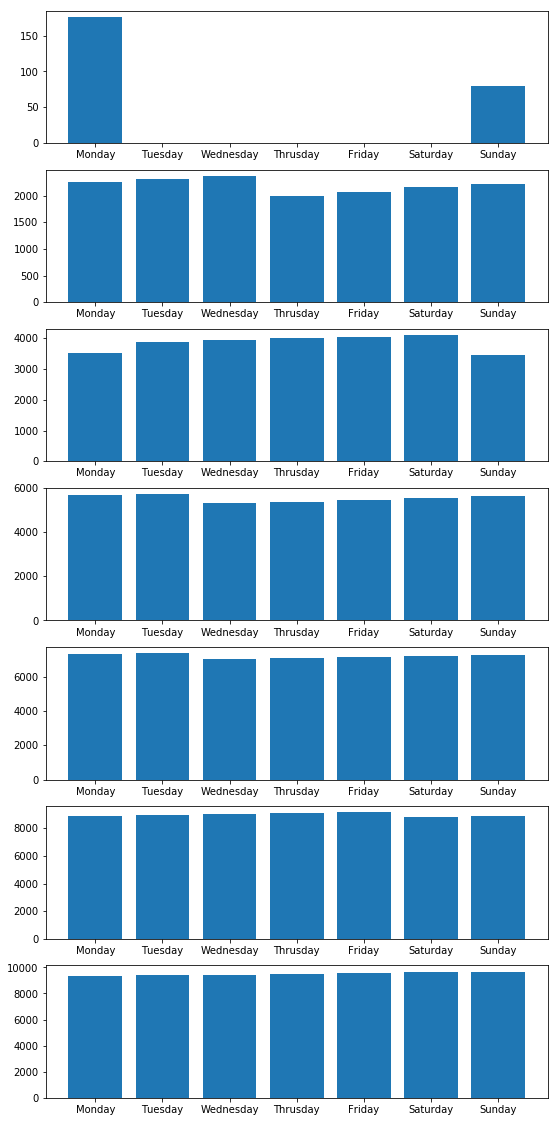

In [16]:
fig = plt.figure(1,figsize=(9, 20))
ax = fig.subplots(nrows=len(a_months), ncols=1)
i=0
for row in ax:
        
        temp =  df_modified.loc[df_modified["date_time"].dt.month==a_months[i]] 
        row.bar(temp["weekday"],temp["Transaction"])
        i=i+1
plt.setp(ax, xticks=[0,1,2,3,4,5,6], xticklabels=name_day)
plt.savefig('./graphs/months_amount-transaction-vs-day.png',bbox_inches='tight', dpi=2000)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1,figsize=(12, 3))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [ ]:
df_modified.loc[df_modified["date_time"].dt.month==10].weekday.value_counts()
print(df_modified.loc[df_modified["date_time"].index.max()])
print(df_modified.loc[df_modified["date_time"].index.min()])
print(df_modified.info())